<a href="https://colab.research.google.com/github/Amaljayaranga/Autoencoders/blob/master/ConvCustomAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

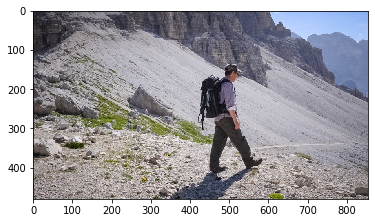

torch.Size([10, 3, 480, 854])


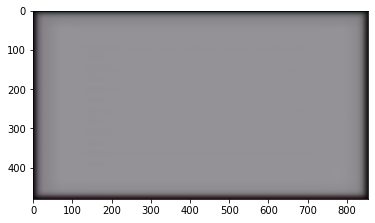

In [73]:
import glob
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary
from PIL import Image
import cv2


class DavisDataset(Dataset):

    def __init__(self,img_path):
        self.img_arr = glob.glob(str(img_path)+"/*")
        self.len = len(self.img_arr)
        #print(self.len)

    def __getitem__(self, index):
        single_img_name = self.img_arr[index]
        single_img = Image.open(single_img_name)
        #single_img.show()
        img_np = np.asarray(single_img)
        img_tensor = transforms.ToTensor()(img_np)
        #print(img_tensor.shape)
        return img_tensor

    def __len__(self):
        return self.len

#from google.colab import drive
#drive.mount('/content/drive')

dataset = DavisDataset('drive/My Drive/hike')
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

#d = next(iter(dataloader))
#print(d.shape)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder,self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(10, 20), stride=2, padding=3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.Conv2d(in_channels=6, out_channels=12, kernel_size=(10, 20), stride=3, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(3,3), stride=3, padding=0),
            nn.Conv2d(in_channels=12, out_channels=16, kernel_size=(3, 4), stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(2, 2), stride=1, padding=1)
        )


        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=16, out_channels=12, kernel_size=(3,6), padding=1, stride=2),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(in_channels=12, out_channels=9, kernel_size=(8,14), padding=1,stride=3),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(in_channels=9, out_channels=7, kernel_size=(14,20), padding=1,stride=3),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(in_channels=7, out_channels=5, kernel_size=(16,20), padding=1,stride=3),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(in_channels=5, out_channels=3, kernel_size=(15,16), stride=1,padding=2),
            nn.Tanh()
        )


    def forward(self,x):
        x = self.encoder(x)
        #print(x.shape)
        x = self.decoder(x)
        #print(x.shape)
        return x


model = autoencoder()
#summary(model,(1,28,28))
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#img = next(iter(dataloader))
#print(img.shape)
#output = model(img)
#print(output.shape)

train = False

if train:
    for epoch in range(5):
        for data in dataloader:
            img = data
            img = img.view(img.size(0), 3, 480, 854)
            #print(img.size())
            img = Variable(img)
            #print(img.size())


            output = model(img)
            #print(output.size())
            loss = criterion(output,img)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print('Epoch :', epoch+1, 'Loss:',loss.item())

    torch.save(model, './conv_cus_autoencoder.pth')

if not train:
    model = torch.load('./conv_cus_autoencoder.pth')
    model.eval()

    img = next(iter(dataloader))
    #print(img.shape)
    plt.imshow(img[0].permute(1, 2, 0))
    plt.show()


    img = img.view(img.size(0), 3, 480, 854)
    img = Variable(img)
    print(img.shape)
#with torch.no_grad():
    output = model(img)
    #print(output.size())

    #tensor_image = output[0].view(output.shape[2], output.shape[3], output.shape[1])
    #print(type(tensor_image), tensor_image.shape)

    #plt.imshow(tensor_image.detach().numpy())
    #plt.show()

    plt.imshow(transforms.ToPILImage()(output[0]), interpolation="bicubic")
    plt.show()

    #print(output.shape)
    #plt.imshow(output[0].permute(1, 2, 0))
    #plt.show()

